In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
import matplotlib.font_manager as fm
mlt.rc("font", family = "NanumBarunGothic")
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

W:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
W:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


W:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


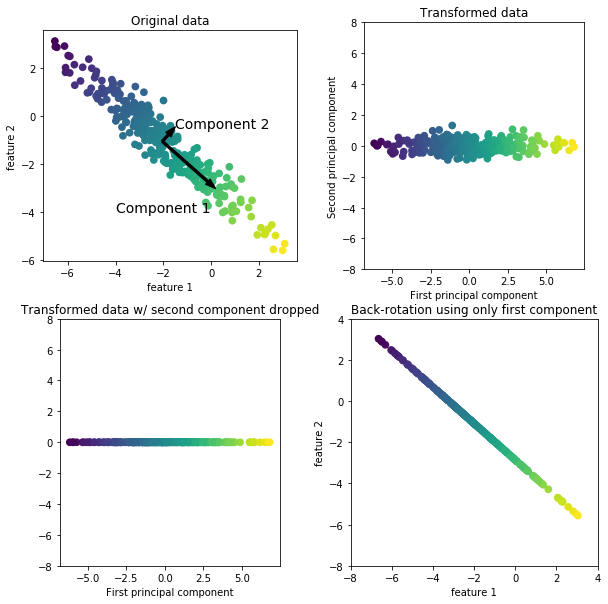

In [30]:
mglearn.plots.plot_pca_illustration()

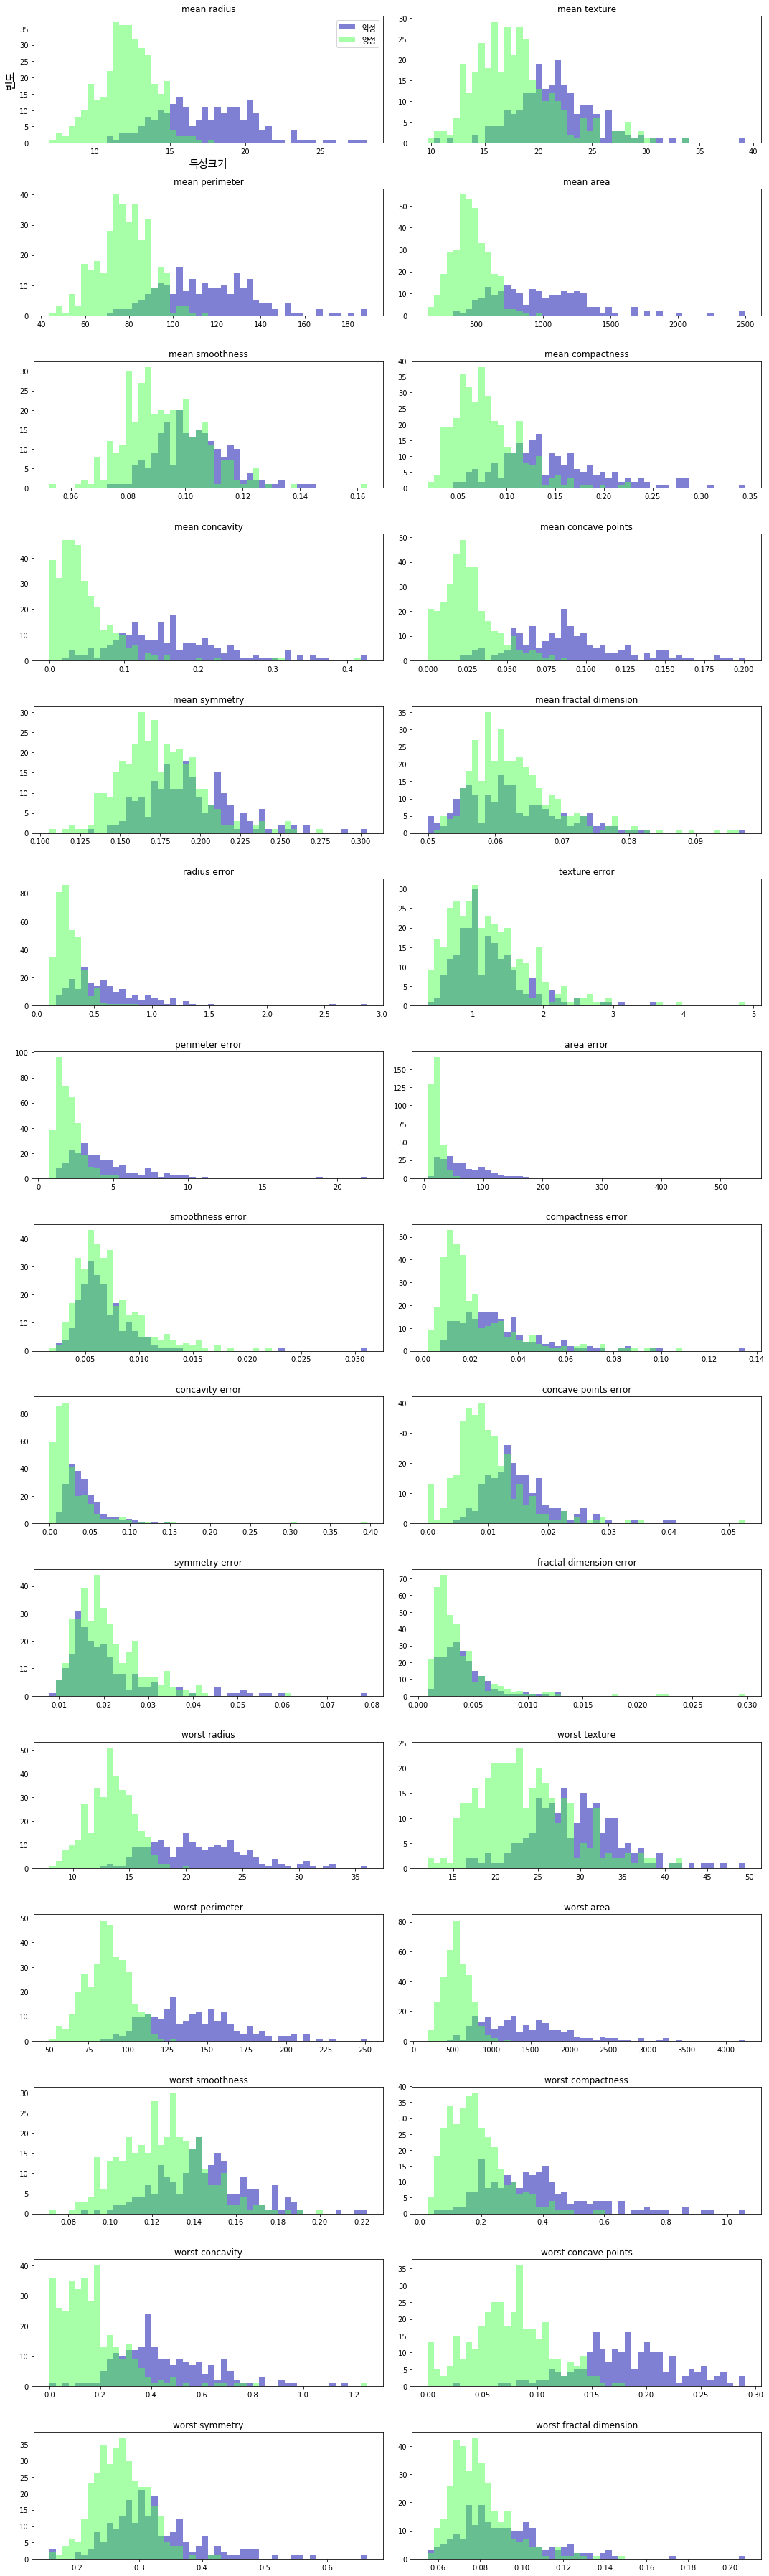

In [31]:
fig, axes = plt.subplots(15, 2, figsize = (15, 50))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = .5 )
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[0].set_xlabel("특성크기", fontproperties = fontprop)
    ax[0].set_ylabel("빈도", fontproperties = fontprop)
    ax[0].legend(["악성","양성"], loc = "best", prop = fontprop_1)
    fig.tight_layout()

In [32]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# first, you choise how many component be maintain
# 몇개의 주성분을 남길지 정한다
pca = PCA(n_components = 2)

# make PCA model to use breast cancer data
# 스케일조정된 유방암데이터로 PCA모델을 만든다
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본데이터 형태:", str(X_scaled.shape))
print("축소된 데이터형태:", str(X_pca.shape))


원본데이터 형태: (569, 30)
축소된 데이터형태: (569, 2)


Text(0, 0.5, '두 번재 주성분')

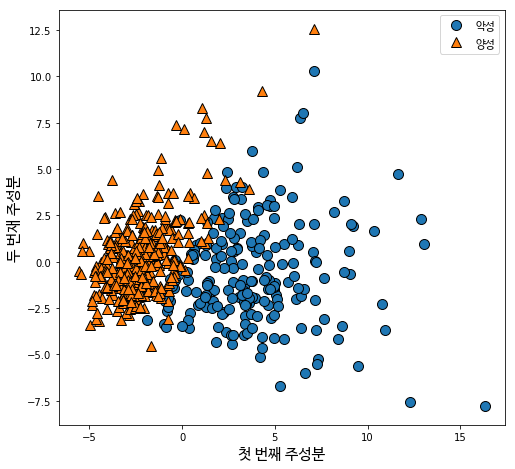

In [16]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc = "best", prop = fontprop_1)
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분", fontproperties = fontprop)
plt.ylabel("두 번재 주성분", fontproperties = fontprop)

In [33]:
print("PCA 주성분 형태\n", pca.components_.shape)

print("\nPCA 주성분\n", pca.components_)

PCA 주성분 형태
 (2, 30)

PCA 주성분
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


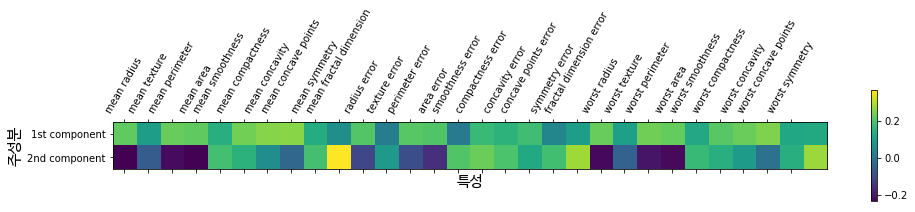

In [69]:
plt.matshow(pca.components_, cmap = "viridis")
plt.xlabel("특성", fontproperties = fontprop)
plt.ylabel("주성분", fontproperties= fontprop)
plt.yticks([0,1], ["1st component", "2nd component"])
plt.xticks(range(29), cancer.feature_names, rotation = 60)
plt.colorbar()